  #                  ZOMATO RATING PREDICTION AND ANALYSIS

In [1]:
#loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading excel file
zmt = pd.read_excel('zomato_train.xlsx')
zmt.head(2)

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rates
0,https://www.zomato.com/bangalore/al-swaad-take...,"18, Masjid Street, Opp Akbari Masjid Neelasand...",Al Swaad Take Away,Yes,No,13,+91 7019942388\n+91 9902335220,Richmond Road,Quick Bites,NaN,"North Indian, South Indian, Arabian",350,"[('Rated 1.0', 'RATED\n If U need reasonable ...","['Beef Seekh Kabab', 'Beef BBQ Chops', 'Beef M...",Delivery,Residency Road,3.1
1,https://www.zomato.com/bangalore/the-boozy-gri...,"2nd Floor, 1st A Cross Road, Jyothi Nivas Coll...",The Boozy Griffin,No,Yes,5015,080 33512954,Koramangala 5th Block,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800","[('Rated 5.0', 'RATED\n Really great ambience...",[],Dine-out,Koramangala 6th Block,4.6


In [133]:
zmt.shape

(41373, 17)

The total number of rows is 41373.
The total number of columns is 17.

In [134]:
zmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41373 entries, 0 to 41372
Data columns (total 17 columns):
url                            41373 non-null object
address                        41373 non-null object
name                           41373 non-null object
online_order                   41373 non-null object
book_table                     41373 non-null object
votes                          41373 non-null int64
phone                          40402 non-null object
location                       41358 non-null object
rest_type                      41198 non-null object
dish_liked                     18901 non-null object
cuisines                       41341 non-null object
approx_cost(for two people)    41094 non-null object
reviews_list                   41373 non-null object
menu_item                      41373 non-null object
listed_in(type)                41373 non-null object
listed_in(city)                41373 non-null object
rates                          33392 non-nul

In [48]:
zm.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
votes                              0
phone                            971
location                          15
rest_type                        175
dish_liked                     22472
cuisines                          32
approx_cost(for two people)      279
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rates                           7981
dtype: int64

* Cuisines has the least number of null values.So further dropping those rows in all columns also eliminates null values from location.

In [3]:
zmt = zmt[zmt['cuisines'].notnull()]

In [205]:
zmt.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
votes                              0
phone                            951
location                           0
rest_type                        160
dish_liked                     22440
cuisines                           0
approx_cost(for two people)      261
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rates                           7955
dtype: int64

* We can clearly drop the following columns as they might not be useful for our analysis. 'url' , 'address','phone','listed_in(city)'

In [4]:
zmt = zmt.drop(columns = ['url', 'address','phone','listed_in(city)'])

In [5]:
zmt.shape

(41341, 13)

**Renaming two columns:**

In [6]:
zmt.rename(columns={'approx_cost(for two people)': 'average_cost'}, inplace=True)
zmt.rename(columns={'listed_in(type)': 'listed_in_type'}, inplace=True)

In [209]:
zmt.head(2)

,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_in_type,rates
0,Al Swaad Take Away,Yes,No,13,Richmond Road,Quick Bites,NaN,"North Indian, South Indian, Arabian",350,"[('Rated 1.0', 'RATED\n If U need reasonable ...","['Beef Seekh Kabab', 'Beef BBQ Chops', 'Beef M...",Delivery,3.1
1,The Boozy Griffin,No,Yes,5015,Koramangala 5th Block,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800","[('Rated 5.0', 'RATED\n Really great ambience...",[],Dine-out,4.6


# **Exploratory Data Analysis:**

In [7]:
zm = zmt.copy(deep=True)

In [143]:
zm.name.describe()

count               41341
unique               8482
top       Cafe Coffee Day
freq                   81
Name: name, dtype: object

Text(0.5, 1.0, 'Name vs Number of Restaurant')

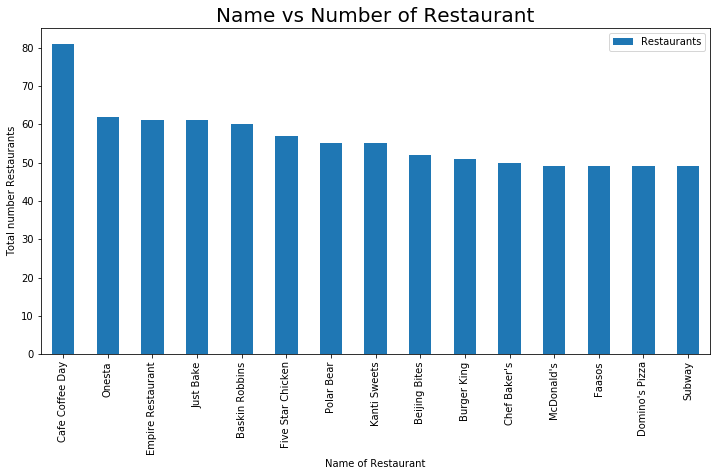

In [60]:
plt.figure(figsize = (12,6))
gp = zm['name'].value_counts()[:15].plot(kind ='bar')
gp.legend(['Restaurants'])
plt.xlabel("Name of Restaurant")
plt.ylabel("Total number Restaurants")
plt.title("Name vs Number of Restaurant",fontsize =20)

* It can be seen that Cafe coffee day owns the maximum number of restaurants.And above plotted are the top 15 restaurants in number.

In [72]:
zm['online_order'].value_counts()

Yes    24319
No     17022
Name: online_order, dtype: int64

In [80]:
zm['online_order'].isnull().sum()

0

Text(0.5, 1.0, 'Restaurants accepting online food orders')

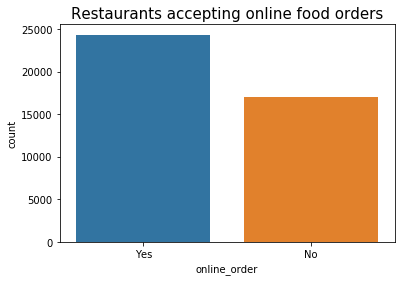

In [77]:
sns.countplot(zm['online_order'])
plt.title("Restaurants accepting online food orders",fontsize =15)

* It is observed that most of the restaurants accept online food ordering.
* There are no null values in it.

In [81]:
zm['book_table'].value_counts()

No     36199
Yes     5142
Name: book_table, dtype: int64

In [83]:
zm['book_table'].isnull().sum()

0

Text(0.5, 1.0, 'Restaurants permits Table booking')

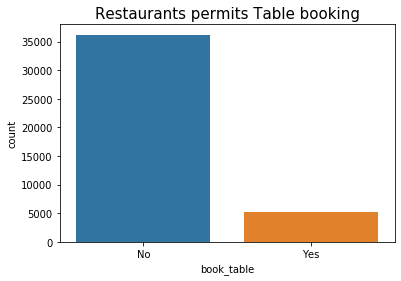

In [84]:
sns.countplot(zm['book_table'])
plt.title("Restaurants permits Table booking",fontsize =15)

* Very few permits users to book table prior.
* No null values

In [101]:
zm['location'].value_counts()[:10]

BTM                      4077
HSR                      2005
Koramangala 5th Block    2002
JP Nagar                 1807
Whitefield               1711
Indiranagar              1638
Jayanagar                1542
Marathahalli             1495
Bannerghatta Road        1339
Bellandur                1016
Name: location, dtype: int64

In [107]:
zm['location'].value_counts()[-10:]

Hebbal                  11
KR Puram                11
Kengeri                  8
Central Bangalore        7
Nagarbhavi               6
West Bangalore           6
Yelahanka                4
Jakkur                   2
Rajarajeshwari Nagar     2
Peenya                   1
Name: location, dtype: int64

Text(0.5, 1.0, 'Location vs Count')

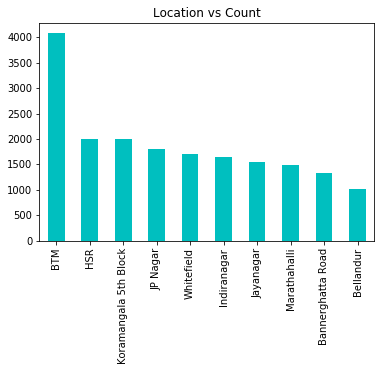

In [112]:
zm['location'].value_counts()[:10].plot(kind ='bar', color = 'c')
plt.title("Location vs Count")

Text(0.5, 1.0, 'Location vs Count')

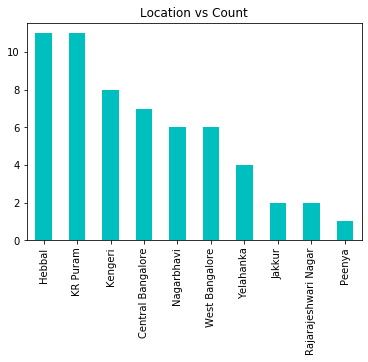

In [113]:
zm['location'].value_counts()[-10:].plot(kind ='bar', color = 'c')
plt.title("Location vs Count")

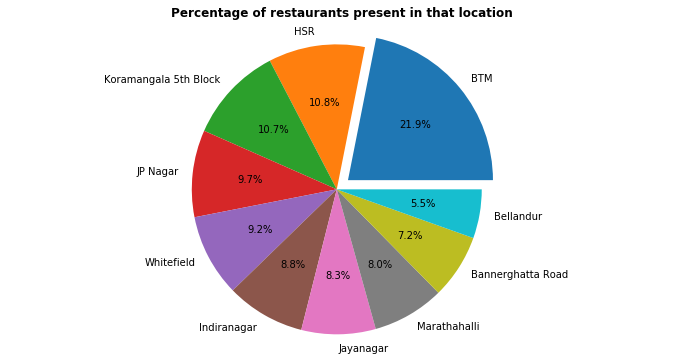

In [100]:
plt.figure(figsize = (12,6))
names = zm['location'].value_counts()[:10].index
values = zm['location'].value_counts()[:10].values
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

plt.pie(values, explode=explode, labels=names,autopct='%1.1f%%')
plt.axis('equal')
plt.title("Percentage of restaurants present in that location", weight = 'bold')
plt.show()

* BTM and HSR tops the maximun number of restaurants.
* Jakkur, Rajarajeshwari Nagar and Peenya are the locations with 1 or 2 restaurants.

In [120]:
zm['rest_type'].value_counts().head(10)

Quick Bites           15292
Casual Dining          8320
Cafe                   2960
Delivery               2077
Dessert Parlor         1814
Takeaway, Delivery     1632
Bakery                  913
Casual Dining, Bar      908
Beverage Shop           678
Bar                     563
Name: rest_type, dtype: int64

In [121]:
zm['rest_type'].value_counts()[-10:]

Bakery, Sweet Shop            3
Bakery, Food Court            2
Dessert Parlor, Food Court    2
Food Court, Beverage Shop     2
Cafe, Food Court              2
Pop Up                        2
Mess, Quick Bites             2
Dessert Parlor, Kiosk         2
Sweet Shop, Dessert Parlor    1
Quick Bites, Kiosk            1
Name: rest_type, dtype: int64

Text(0.5, 1.0, 'Restaurant type vs Count')

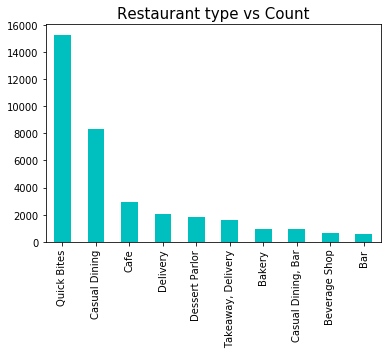

In [128]:
zm['rest_type'].value_counts()[:10].plot(kind ='bar', color = 'c')
plt.title("Restaurant type vs Count",fontsize = 15)

* Most frequently visited type of restaurants -Quick Bites

In [125]:
zm['average_cost'].value_counts()

300      6046
400      5257
500      3973
200      3869
600      2986
250      2338
800      1823
150      1682
700      1566
350      1401
1,000    1305
450      1146
100       804
1,200     796
1,500     783
650       638
550       614
750       612
900       554
1,300     415
1,100     406
1,400     371
2,000     285
1,600     216
1,700     177
1,800     154
850       143
3,000     129
2,500     108
1,900      59
         ... 
180        14
1,350      12
80         10
230         9
2,600       9
2,300       9
3,400       9
130         7
1,250       7
50          6
40          5
1,450       4
1,650       4
1,050       4
199         4
330         4
2,700       3
70          3
4,100       3
240         2
4,500       2
140         2
6,000       2
190         2
360         2
5,000       1
160         1
3,200       1
3,700       1
60          1
Name: average_cost, Length: 68, dtype: int64

Text(0.5, 1.0, 'Approximate cost for 2 people')

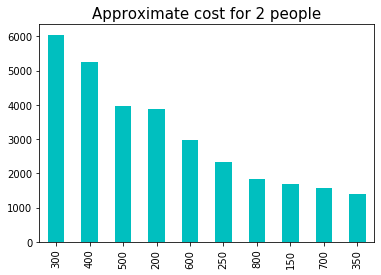

In [127]:
zm['average_cost'].value_counts()[:10].plot(kind ='bar', color = 'c')
plt.title("Approximate cost for 2 people",fontsize = 15)

* The average cost for 2 people in top 10 restaurants which people prefer are less than 1000(mostly 200 to 500).But there are restaurants in which the avg cost is more than 1000 and also least as Rs.40

In [144]:
zm['dish_liked'].head(20)

0                                                   NaN
1     Cocktails, Craft Beer, Salads, Devils Chicken,...
2                                                   NaN
3     Noodles, Laksa, Cocktails, Dumplings, Sangria,...
4                                                   NaN
5                                                   NaN
6                                                   NaN
7     Coffee, Cocktails, Tiramisu, Cappuccino, Hot C...
8     Burgers, Coffee, Waffles, Mocktails, Pasta, Br...
9                                        Biryani, Raita
10                                                  NaN
11    Coffee, Paratha, Chaat, Masala Dosa, Dahipuri,...
12                                                  NaN
13                                                  NaN
14                                                  NaN
15                                                  NaN
16                                                  NaN
17                                              

In [8]:
#since there are 22472 null values in dish_liked, we remove those null values
dishes_data = zm[zm['dish_liked'].notnull()]
dishes_data['dish_liked'] = dishes_data['dish_liked'].apply(lambda x:x.lower().strip())

In [148]:
dishes_data.head(2)

,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_in_type,rates
1,The Boozy Griffin,No,Yes,5015,Koramangala 5th Block,"Casual Dining, Pub","cocktails, craft beer, salads, devils chicken,...","European, Continental","1,800","[('Rated 5.0', 'RATED\n Really great ambience...",[],Dine-out,4.6
3,Sriracha,No,No,699,Lavelle Road,Casual Dining,"noodles, laksa, cocktails, dumplings, sangria,...","Thai, Chinese, Indonesian, Asian, Momos","1,500","[('Rated 3.0', 'RATED\n Another restaurant in...",[],Dine-out,4.3


In [149]:
dishes_data.isnull().sum()

name                0
online_order        0
book_table          0
votes               0
location            0
rest_type          56
dish_liked          0
cuisines            0
average_cost      111
reviews_list        0
menu_item           0
listed_in_type      0
rates             144
dtype: int64

In [150]:
dishes_data['dish_liked'].head(10)

1     cocktails, craft beer, salads, devils chicken,...
3     noodles, laksa, cocktails, dumplings, sangria,...
7     coffee, cocktails, tiramisu, cappuccino, hot c...
8     burgers, coffee, waffles, mocktails, pasta, br...
9                                        biryani, raita
11    coffee, paratha, chaat, masala dosa, dahipuri,...
24    tomato soup, brownie shake, pizza, salad, frie...
25                       coffee, sandwiches, cappuccino
26    vegetable biryani, jalebi, paneer curry, tando...
28                                          dum biryani
Name: dish_liked, dtype: object

In [9]:
dish_count = []
for i in dishes_data['dish_liked']:
    for t in i.split(','):
        t = t.strip() 
        dish_count.append(t)

Text(0.5, 1.0, 'Top 10 dished_liked in Bangalore')

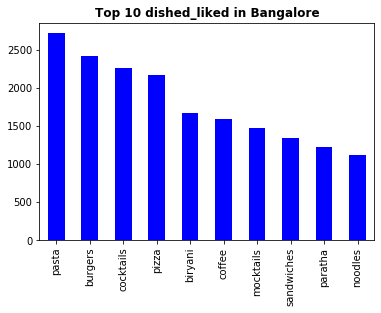

In [156]:
pd.Series(dish_count).value_counts()[:10].plot(kind='bar',color= 'b')
plt.title('Top 10 dished_liked in Bangalore',weight='bold')

* Pasta is the most preferred food amoung all.

In [10]:
cuisines_data = zm[zm.cuisines.notnull()]
cuisines_data.cuisines = cuisines_data.cuisines.apply(lambda x:x.lower().strip())

In [11]:
cuisines_count= []

for i in cuisines_data.cuisines:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0.5, 1.0, 'Top 10 cuisines in Bangalore')

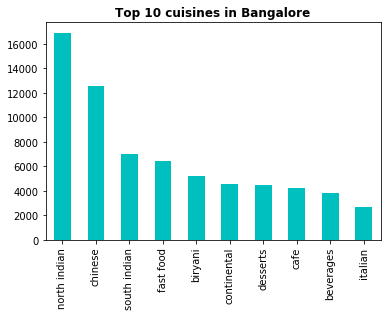

In [177]:
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'c')
plt.title('Top 10 cuisines in Bangalore',weight='bold')

* The most prefrerred cuisine in Banglore is North Indian.

In [12]:
zm['rates'] = zm['rates'].replace('-',np.NaN)
zm.dropna(how = 'any', inplace = True)

In [13]:
zm['rates'] = zm.loc[:,'rates'].replace('[ ]','',regex = True)
zm['rates'] = zm['rates'].astype(str)
zm['rates'] = zm['rates'].apply(lambda r: float(r))

Text(0.5, 1.0, 'rate vs oline order')

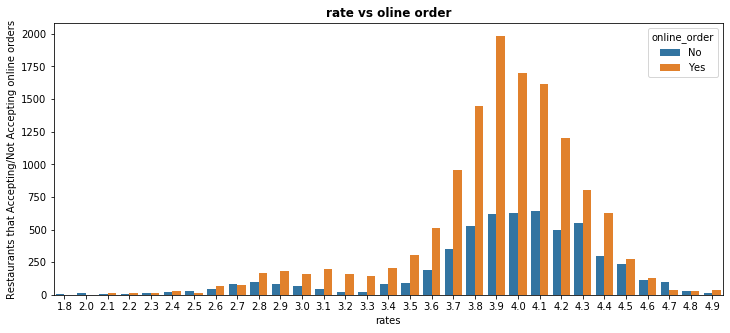

In [192]:
plt.figure(figsize = (12,5))
sns.countplot(x=zm['rates'], hue = zm['online_order'])
plt.ylabel("Restaurants that Accepting/Not Accepting online orders")
plt.title("rate vs oline order",weight = 'bold')

* There is a clear effect on Rating with respect to Online order

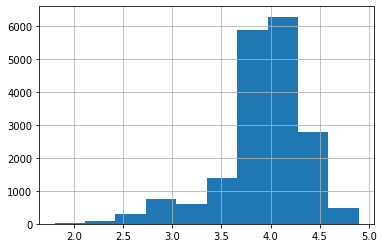

In [197]:
zm.rates.hist()

In [199]:
zm.rates.mean()

3.906723321858919

* The average rating falls between 3.9 to 4.2

# Insights:

* 24319 restaurants are accepting online orders.
* 36199 restaurants have the table booking facility.
* We have highest number of restaurants in BTM. 
* The most preferred restaurant type in Banglore is Quick Bites.
* The most liked cuisine in Banglore is North Indian.
* There are 6046 Restaurants with an average cost for two people of 300 rupees.
* The most Liked dish is Pasta.

**Data preprocessing for Model Building:**

In [211]:
zmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41341 entries, 0 to 41372
Data columns (total 13 columns):
name              41341 non-null object
online_order      41341 non-null object
book_table        41341 non-null object
votes             41341 non-null int64
location          41341 non-null object
rest_type         41181 non-null object
dish_liked        18901 non-null object
cuisines          41341 non-null object
average_cost      41080 non-null object
reviews_list      41341 non-null object
menu_item         41341 non-null object
listed_in_type    41341 non-null object
rates             33386 non-null object
dtypes: int64(1), object(12)
memory usage: 4.4+ MB


In [14]:
zmt.isnull().sum()

name                  0
online_order          0
book_table            0
votes                 0
location              0
rest_type           160
dish_liked        22440
cuisines              0
average_cost        261
reviews_list          0
menu_item             0
listed_in_type        0
rates              7955
dtype: int64

In [15]:
#dropping dish_liked because most of them are null
zmt = zmt.drop(columns=['dish_liked'])

In [16]:
zmt.drop(columns=['reviews_list','menu_item','listed_in_type'], inplace  =True)

In [17]:
zmt['online_order']= pd.get_dummies(zmt.online_order, drop_first=True)
zmt['book_table']= pd.get_dummies(zmt.book_table, drop_first=True)

In [18]:
zmt['rest_type'] = zmt['rest_type'].str.replace(',' , '') 
zmt['rest_type'] = zmt['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
zmt['rest_type'].value_counts().head()

Bites Quick       15292
Casual Dining      8320
Cafe               2960
Delivery           2077
Dessert Parlor     1814
Name: rest_type, dtype: int64

In [19]:
zmt['cuisines'] = zmt['cuisines'].str.replace(',' , '') 
zmt['cuisines'] = zmt['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
zmt['cuisines'].value_counts().head()

Indian North                         2348
Chinese Indian North                 2261
Indian South                         1474
Chinese Indian Indian North South    1219
Bakery Desserts                       901
Name: cuisines, dtype: int64

In [20]:
zmt.shape

(41341, 9)

In [222]:
zmt.head(3)

,name,online_order,book_table,votes,location,rest_type,cuisines,average_cost,rates
0,Al Swaad Take Away,1,0,13,Richmond Road,Bites Quick,Arabian Indian Indian North South,350,3.1
1,The Boozy Griffin,0,1,5015,Koramangala 5th Block,Casual Dining Pub,Continental European,"1,800",4.6
2,Barkat,0,0,6,BTM,Bites Quick,Kerala,250,3.4


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  

zmt['location'] = le.fit_transform(zmt['location'])
zmt['rest_type'] = le.fit_transform(zmt['rest_type'])
zmt['cuisines'] = le.fit_transform(zmt['cuisines'])

In [22]:
zmt.isnull().sum()

name               0
online_order       0
book_table         0
votes              0
location           0
rest_type          0
cuisines           0
average_cost     261
rates           7955
dtype: int64

In [23]:
zmo = zmt.copy(deep=True)

In [24]:
zmo['rates'] = zmo['rates'].replace('-',np.NaN)
zmo.dropna(how = 'any', inplace = True)

In [25]:
zmo['rates'] = zmo.loc[:,'rates'].replace('[ ]','',regex = True)
zmo['rates'] = zmo['rates'].astype(str)
zmo['rates'] = zmo['rates'].apply(lambda x: float(x))

In [26]:
zmo['average_cost'] = zmo['average_cost'].str.replace(',' ,'') 
zmo['average_cost'] = zmo['average_cost'].astype('float')

In [27]:
zmo.shape

(33132, 9)

In [28]:
zmo.head(10)

,name,online_order,book_table,votes,location,rest_type,cuisines,average_cost,rates
0,Al Swaad Take Away,1,0,13,71,29,321,350.0,3.1
1,The Boozy Griffin,0,1,5015,45,43,1461,1800.0,4.6
2,Barkat,0,0,6,0,29,1824,250.0,3.4
3,Sriracha,0,0,699,51,40,376,1500.0,4.3
4,Sri Ganesh Juice Junction,1,0,129,48,20,1639,150.0,3.7
5,Invitation Bar & Restaurant,0,0,15,0,8,1789,1000.0,3.0
6,Revoli Hotel,0,0,23,78,40,1403,450.0,3.1
7,Chez Nous - Novotel,0,1,125,56,60,1587,2500.0,3.9
8,Maxpresso,0,0,324,47,31,57,700.0,4.1
9,Hyderabadi Biryani Hub,1,0,218,0,40,913,600.0,3.6


In [241]:
zmo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33132 entries, 0 to 41371
Data columns (total 9 columns):
name            33132 non-null object
online_order    33132 non-null uint8
book_table      33132 non-null uint8
votes           33132 non-null int64
location        33132 non-null int32
rest_type       33132 non-null int32
cuisines        33132 non-null int32
average_cost    33132 non-null float64
rates           33132 non-null float64
dtypes: float64(2), int32(3), int64(1), object(1), uint8(2)
memory usage: 1.7+ MB


**Checking the correlation and also the outliers if any:**

In [109]:
zmo.corr()

,online_order,book_table,votes,location,rest_type,cuisines,average_cost,rates
online_order,1.000000,-0.055188,-0.013941,-0.070754,0.023386,-0.042926,-0.173626,0.069620
book_table,-0.055188,1.000000,0.387674,0.093207,0.008102,-0.097615,0.616354,0.427300
votes,-0.013941,0.387674,1.000000,0.049182,0.060328,-0.137702,0.363648,0.434394
location,-0.070754,0.093207,0.049182,1.000000,0.009468,-0.010518,0.166120,0.089818
rest_type,0.023386,0.008102,0.060328,0.009468,1.000000,0.116046,0.095124,0.024198
cuisines,-0.042926,-0.097615,-0.137702,-0.010518,0.116046,1.000000,-0.113890,-0.116601
average_cost,-0.173626,0.616354,0.363648,0.166120,0.095124,-0.113890,1.000000,0.384836
rates,0.069620,0.427300,0.434394,0.089818,0.024198,-0.116601,0.384836,1.000000


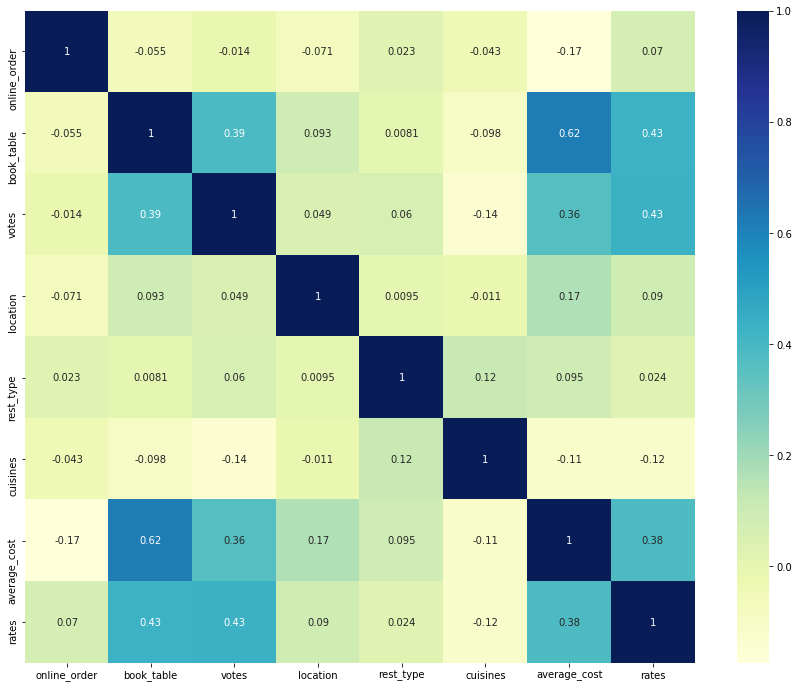

In [29]:
plt.figure(figsize=(15,12))
sns.heatmap(zmo.corr(),annot=True,cmap="YlGnBu")

* Every independent variable is less correlated with the dependent variable(rates).

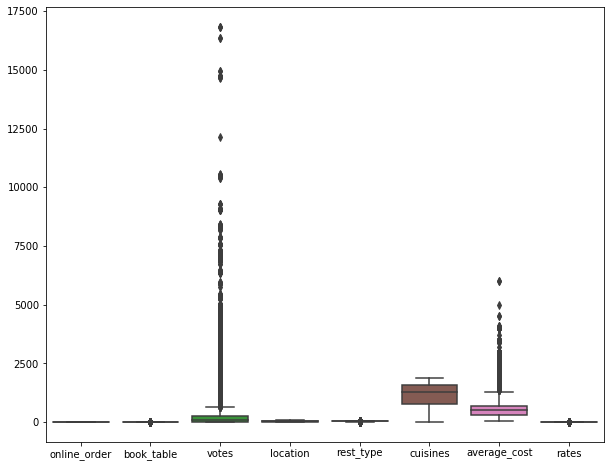

In [31]:
a = zmo[['online_order', 'book_table', 'votes', 'location', 'rest_type',
       'cuisines', 'average_cost', 'rates']]
plt.figure(figsize=(10,8))
sns.boxplot(data=a)

* There are lot of outliers in the votes column and also in average cost.

In [32]:
zmo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33132 entries, 0 to 41371
Data columns (total 9 columns):
name            33132 non-null object
online_order    33132 non-null uint8
book_table      33132 non-null uint8
votes           33132 non-null int64
location        33132 non-null int32
rest_type       33132 non-null int32
cuisines        33132 non-null int32
average_cost    33132 non-null float64
rates           33132 non-null float64
dtypes: float64(2), int32(3), int64(1), object(1), uint8(2)
memory usage: 1.7+ MB


In [37]:
zmo.sample(5)

,name,online_order,book_table,votes,location,rest_type,cuisines,average_cost,rates
14934,Ramji Chaiwale,1,0,122,62,29,785,250.0,3.9
21622,Juice Junction Food Court,1,0,57,4,29,1285,200.0,3.7
5729,Riwaz - The Ritz-Carlton,0,1,275,70,12,1789,4000.0,4.1
3989,Donne Biriyani Mane,1,0,22,16,29,972,250.0,3.1
9489,Kitchen King,1,0,306,59,29,945,400.0,3.8


# Data Modeling:

In [40]:
x_features = zmo.drop(columns = ['name','rates'])
y_feature = zmo['rates']

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_features, y_feature, test_size=0.30, random_state=0)

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

normalized_x_train = pd.DataFrame(sc.fit_transform(x_train), columns = x_train.columns)
normalized_x_test = pd.DataFrame(sc.transform(x_test), columns = x_test.columns)

**Linear Regression:**

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

LR = LinearRegression()
model1 = LR.fit(normalized_x_train,y_train)

In [51]:
LR.score(normalized_x_train,y_train)

0.2981050603958135

In [52]:
LR.score(normalized_x_test,y_test)

0.2832598126442156

**Decision Tree:**

In [54]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
model2 = DT.fit(normalized_x_train,y_train)

In [55]:
DT.score(normalized_x_train,y_train)

0.999384447702788

In [56]:
DT.score(normalized_x_test,y_test)

0.8217522183567084

**Random Forest:**

In [59]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
model3 = RF.fit(normalized_x_train,y_train)

In [60]:
RF.score(normalized_x_train,y_train)

0.9766876106277389

In [61]:
RF.score(normalized_x_test,y_test)

0.8732653352013312

**KNeighbors Regressor:**

In [62]:
from sklearn.neighbors import KNeighborsRegressor

KN = KNeighborsRegressor()
model4 = KN.fit(normalized_x_train,y_train)

In [63]:
KN.score(normalized_x_train,y_train)

0.8268067732530795

In [64]:
KN.score(normalized_x_test,y_test)

0.6829121037920657

**Bagging Regressor:**

In [81]:
from sklearn.ensemble import BaggingRegressor

BR = BaggingRegressor(base_estimator=RF)
model5 = BR.fit(normalized_x_train,y_train)

In [82]:
BR.score(normalized_x_train,y_train)

0.9466125997366437

In [83]:
BR.score(normalized_x_test,y_test)

0.8500199904156017

**AdaBoostRegressor:**

In [99]:
from sklearn.ensemble import AdaBoostRegressor

AR = AdaBoostRegressor(base_estimator=RF,n_estimators=52)
model6 = AR.fit(normalized_x_train,y_train)

In [100]:
AR.score(normalized_x_train,y_train)

0.9813132706929609

In [101]:
AR.score(normalized_x_test,y_test)

0.8962833234001886

* Amoung all the models Random forest perform well.So further trying bagging and boosting on Random forest,Adaboostregressor using random forest as a base estimator outperforms all the model in both testing and training.

In [102]:
ypred = AR.predict(normalized_x_test)

In [106]:
from sklearn.metrics import mean_squared_error

RMSE = np.sqrt(mean_squared_error(y_test,ypred))
RMSE

0.1415330628145438

* This has a very low RMSE score which shows that our model performs well.

In [108]:
ActVsPred = pd.DataFrame({ "actual": y_test, "pred": ypred })
ActVsPred

,actual,pred
2439,3.9,3.820000
29693,4.6,4.600000
35095,3.8,3.920000
7348,3.4,3.346667
30912,3.5,3.460000
15835,3.7,3.610000
34513,3.6,3.600000
26755,3.0,3.065833
23835,2.6,3.510000
11013,4.0,3.890000


--------------------------------------------------- END---------------------------------------------------------